In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

I want to find a home in Edmonton. I need your help!

We need to start looking at information on home prices so I can start to see if I can afford a house. I've grabbed the property assessment data for all purely residential properties in Edmonton. (In theory this should be the entire population of homes in Edmonton, in reality, it is probably a sample as there's some properties that are oddly classified - e.g. part farm, part residential or BnB, etc...)

We should probably start with loading the data into a useful format, the file is in Assessments.csv

In [2]:
#Load data from CSV and put in a useful data structure
df =pd.read_csv("Assessments.csv")

The data is all loaded up. We should first figure out what we have...

In [3]:
#Examine the data. We may want to create another code cell and look at the data in more than one way.
#Look for categorical and numerical features
df.head()

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
0,1066158,NaN,14904.0,167 AVENUE NW,N,NaN,NaN,NaN,86000,53.630497,-113.580474
1,10508233,NaN,16340.0,MARK MESSIER TRAIL NW,N,NaN,NaN,NaN,45000,53.617335,-113.605690
2,1194398,NaN,15617.0,83 STREET NW,N,2050.0,BELLE RIVE,Ward 3,285000,53.617007,-113.467976
3,1034214,NaN,10661.0,161 AVENUE NW,Y,3040.0,BEAUMARIS,Ward 3,635000,53.619978,-113.506990
4,1114701,NaN,15003.0,76 AVENUE NW,Y,4430.0,RIO TERRACE,Ward 5,407500,53.508644,-113.579897


In [4]:
df.describe(include="all")

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
count,3.842170e+05,80043,342008.000000,342008,384217,384213.000000,384213,384213,3.842170e+05,384217.000000,384217.000000
unique,NaN,1899,NaN,2765,2,NaN,345,12,NaN,NaN,NaN
top,NaN,202,NaN,104 STREET NW,Y,NaN,OLIVER,Ward 9,NaN,NaN,NaN
freq,NaN,979,NaN,2034,235286,NaN,11380,51837,NaN,NaN,NaN
mean,7.813424e+06,NaN,7663.119035,NaN,NaN,4270.033703,NaN,NaN,3.084198e+05,53.518421,-113.512491
std,3.232763e+06,NaN,5439.436817,NaN,NaN,1748.172894,NaN,NaN,2.837778e+05,0.068403,0.082829
min,1.001163e+06,NaN,1.000000,NaN,NaN,1010.000000,NaN,NaN,0.000000e+00,53.338595,-113.712930
25%,4.584405e+06,NaN,2504.000000,NaN,NaN,2660.000000,NaN,NaN,1.700000e+05,53.458619,-113.569078
50%,9.966988e+06,NaN,7916.000000,NaN,NaN,4540.000000,NaN,NaN,3.055000e+05,53.519813,-113.510520
75%,1.017294e+07,NaN,11425.000000,NaN,NaN,5576.000000,NaN,NaN,3.975000e+05,53.574187,-113.447708


Price time! I care about dollars and cents, what can you tell me about the prices of homes in Edmonton?

In [5]:
#Show some insight(s) on the prices of homes in Edmonton
df["Assessed Value"].describe().apply(lambda x: format(x, 'f'))
#I googled "python describe no scientific notation to get the apply part"

count      384217.000000
mean       308419.780150
std        283777.814736
min             0.000000
25%        170000.000000
50%        305500.000000
75%        397500.000000
max      43911500.000000
Name: Assessed Value, dtype: object

I think I want a garage. Are places with garages more expensive?
(After completing this, think about if there are any circumstances that are unclear or unaccounted for when we answer this question.)

In [6]:
#Are garage houses more expensive?
gar = df[df["Garage"]=="Y"]
noGar = df[df["Garage"]=="N"]

In [7]:
gar.head()

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
3,1034214,NaN,10661.0,161 AVENUE NW,Y,3040.0,BEAUMARIS,Ward 3,635000,53.619978,-113.506990
4,1114701,NaN,15003.0,76 AVENUE NW,Y,4430.0,RIO TERRACE,Ward 5,407500,53.508644,-113.579897
5,1012277,NaN,15110.0,45 AVENUE NW,Y,5340.0,RAMSAY HEIGHTS,Ward 9,306500,53.484560,-113.581913
6,1191246,NaN,17407.0,92 STREET NW,Y,2450.0,LAGO LINDO,Ward 3,342500,53.636045,-113.482938
7,1298470,NaN,9347.0,167A AVENUE NW,Y,2450.0,LAGO LINDO,Ward 3,305000,53.629140,-113.486732


In [8]:
noGar.head()

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
0,1066158,NaN,14904.0,167 AVENUE NW,N,NaN,NaN,NaN,86000,53.630497,-113.580474
1,10508233,NaN,16340.0,MARK MESSIER TRAIL NW,N,NaN,NaN,NaN,45000,53.617335,-113.605690
2,1194398,NaN,15617.0,83 STREET NW,N,2050.0,BELLE RIVE,Ward 3,285000,53.617007,-113.467976
9,1222595,NaN,9000.0,168 STREET NW,N,4590.0,WEST MEADOWLARK PARK,Ward 1,357500,53.525299,-113.612953
10,1286483,910,10145.0,121 STREET NW,N,1150.0,OLIVER,Ward 6,120500,53.542162,-113.530183


In [9]:
#Describe both to get summary stats
print(gar["Assessed Value"].describe().apply(lambda x: format(x, 'f')))
print(noGar["Assessed Value"].describe().apply(lambda x: format(x, 'f')))

count      235286.000000
mean       409798.316389
std        206398.749871
min             0.000000
25%        309500.000000
50%        368500.000000
75%        453500.000000
max      12294500.000000
Name: Assessed Value, dtype: object
count      148931.000000
mean       148258.696980
std        313948.854593
min             0.000000
25%         11500.000000
50%        143500.000000
75%        202000.000000
max      43911500.000000
Name: Assessed Value, dtype: object


We can measure this formally with something called the Effect Size. The function for effect size is in the next cell. 

In [10]:

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen Effect Size. Why is this often more useful than just comparing the values like we did above? What can we gather from the value calculated here?

In [11]:
#Compute Cohen Effect Size
CohenEffectSize(gar["Assessed Value"], noGar["Assessed Value"])

1.031466841152849

All this is cool and all, but I want some more information on how much houses cost. What could be a better way to show this....

Can I find a bunch of houses for $100k? $200k? $500k? If I win the lottery, do I have a wide selection of homes that are $10 million?

In [12]:
#Create a histogram to show prices of homes and the distribution
#First I'm going to slice out all 3 price columns, for convenience
#To make a slightly more easy to use dataset, I'm rounding to the nearest $10k - the -4th decimal
allPrice = round(df["Assessed Value"], -4)
garPrice = round(gar["Assessed Value"], -4)
noGarPrice = round(noGar["Assessed Value"], -4)


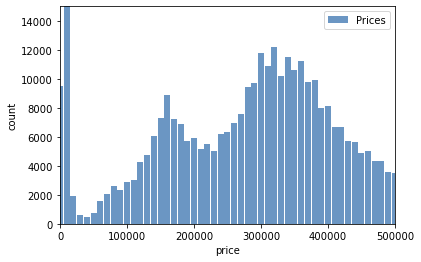

In [13]:
all_hist = thinkstats2.Hist(allPrice.sort_values(), label="Prices")
thinkplot.PrePlot(1)
thinkplot.Hist(all_hist)
thinkplot.Config(xlabel="price", ylabel="count", xlim=[0,500000], ylim=[0,15000])
#all_hist

Sweet, that's more helpful. Can we look at how the distribution is for garage vs non-garage?

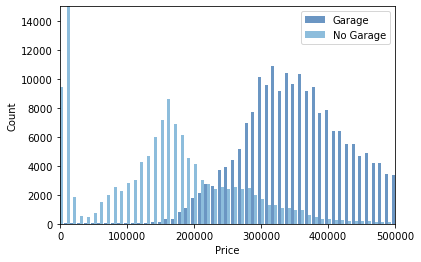

In [14]:
#Create double histogram 
gar_hist = thinkstats2.Hist(garPrice, label="Garage")
noGar_hist = thinkstats2.Hist(noGarPrice, label="No Garage")

width = 4500
thinkplot.PrePlot(2)
thinkplot.Hist(gar_hist, align="right", width=width)
thinkplot.Hist(noGar_hist, align="left", width=width)
thinkplot.Config(xlabel='Price', ylabel='Count', xlim=[0, 500000], ylim=[0,15000])

It looks like the "shape" (distribution) of the house prices is kind of different for the garage vs. not garage, e.g. the garage ones have a tail that goes out to be really expensive...

We can measure this, as it is often a useful thing to know. The variance is a measure of how different each measure is from the mean;
var = (sum(val-mean)^2)/(num_records - 1)
More varaince, the 'farther' the average value is from the mean, or the more spread out the data is. 

In [15]:
#what is the varaiance of each?
print(allPrice.var())
print(garPrice.var())
print(noGarPrice.var())

80545495950.1769
42612776828.571335
98580391294.45813


The varaince gives us an idea of which dataset is more or less spread out, but for individual values, it isn't that useful.

We also have the standard deviation, which is more useful overall. It is just the square root of the varaiance. 

The standard deviation is (kind of) how far away from the mean we expect a typical value to be. E.g. if the average male is 6 feet tall and the standard deviation is 1 inch, we can expect the typical person to be around 5'11" to 6'1", pretty tightly grouped. If the standard deviation is 4 inches, we'd expect the heights to be much more varied - around 5.8 to 6.4. 

In [16]:
#what is the std dev of each?
print(allPrice.std())
print(garPrice.std())
print(noGarPrice.std())

283805.3839344435
206428.6240533791
313975.1443895808


Based of of what we can see in the histograms and the standard deviation, is there anything that we can do to make our analysis a little bit better?

Remember, I want a home - can I really buy one on the far left of the histogram? What's up there?

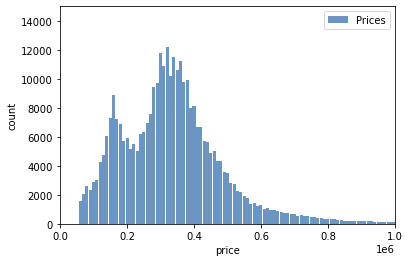

In [17]:
#Filter out super low prices
filt = allPrice[allPrice > 50000]
filtHist = thinkstats2.Hist(filt, label="Prices")
thinkplot.PrePlot(1)
thinkplot.Hist(filtHist)
thinkplot.Config(xlabel="price", ylabel="count", xlim=[0,1000000], ylim=[0,15000])

In [18]:
print(filt.std())
print(filt.mean())

278640.9606772231
349524.14509858494


There's some pretty expensive homes that trail off to the end....
What if we were to look at the baller houses?

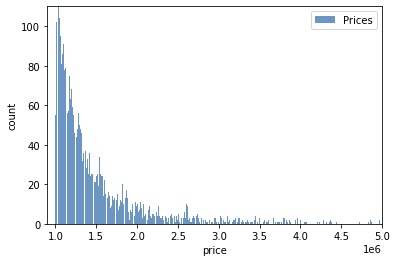

In [19]:
#Look at homes over $750k
richHouses = round(df[df["Assessed Value"]>1000000], -4)
richHist = thinkstats2.Hist(richHouses["Assessed Value"], label="Prices")
thinkplot.PrePlot(1)
thinkplot.Hist(richHist)
thinkplot.Config(xlabel="price", ylabel="count", xlim=[900000,5000000], ylim=[0,110])

Helpful!! Thanks so much. Here's some other things to try...

In [20]:
#Choose two neighborhoods (maybe one you live in, and one you'd like). Calculate the effect size between the two, and graph
#the histogram of both. Does this match your real life understanding? 

In [21]:
#The non-garage homes look realllllllly cheap. Is there anything that can explain this?
#Is there anything that can be done to make our analysis more representative? 